In [5]:
import pandas as pd

data = pd.read_csv('world_population.csv')

print(data.head())


   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796

In [6]:
print(data.head().to_markdown(index=False, numalign="left", stralign="left"))

| Rank   | CCA3   | Country/Territory   | Capital          | Continent   | 2022 Population   | 2020 Population   | 2015 Population   | 2010 Population   | 2000 Population   | 1990 Population   | 1980 Population   | 1970 Population   | Area (km²)   | Density (per km²)   | Growth Rate   | World Population Percentage   |
|:-------|:-------|:--------------------|:-----------------|:------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:------------------|:-------------|:--------------------|:--------------|:------------------------------|
| 36     | AFG    | Afghanistan         | Kabul            | Asia        | 41128771          | 38972230          | 33753499          | 28189672          | 19542982          | 10694796          | 12486631          | 10752971          | 652230       | 63.0587             | 1.0257        | 0.52                          |
| 138    | ALB    | Albania             

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

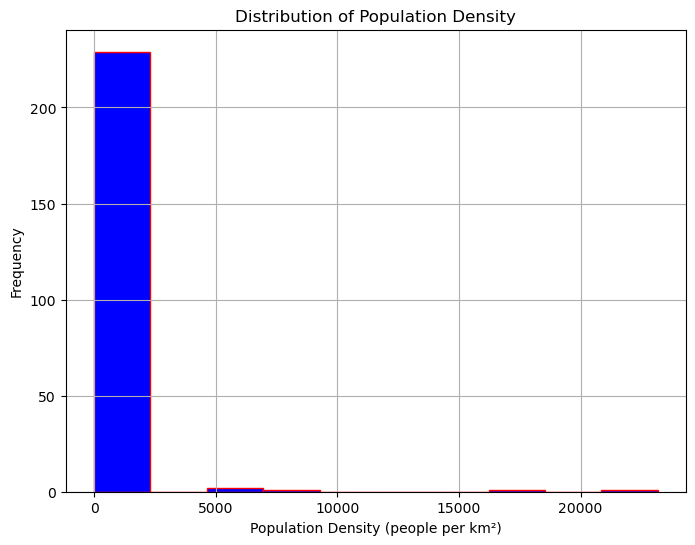

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['Density (per km²)'], bins=10, color='blue', edgecolor='red')
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Frequency')
plt.title('Distribution of Population Density')
plt.grid(True)
plt.show()


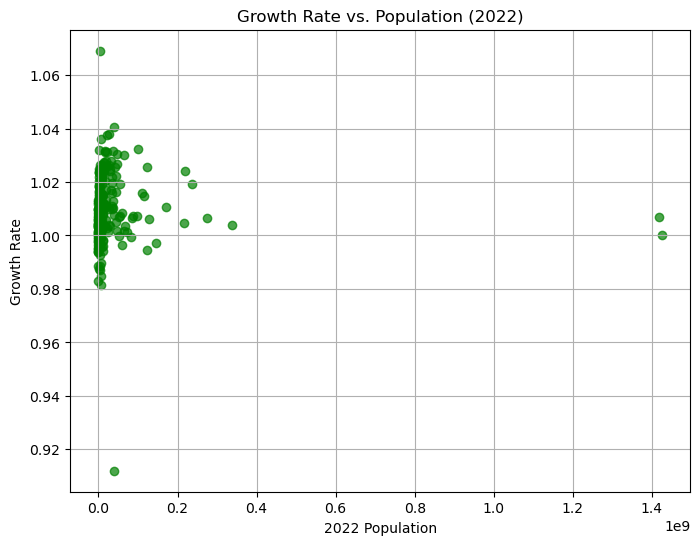

In [13]:
# growth rate vs. population
plt.figure(figsize=(8, 6))
plt.scatter(data['2022 Population'], data['Growth Rate'], color='green', alpha=0.7)
plt.xlabel('2022 Population')
plt.ylabel('Growth Rate')
plt.title('Growth Rate vs. Population (2022)')
plt.grid(True)
plt.show()


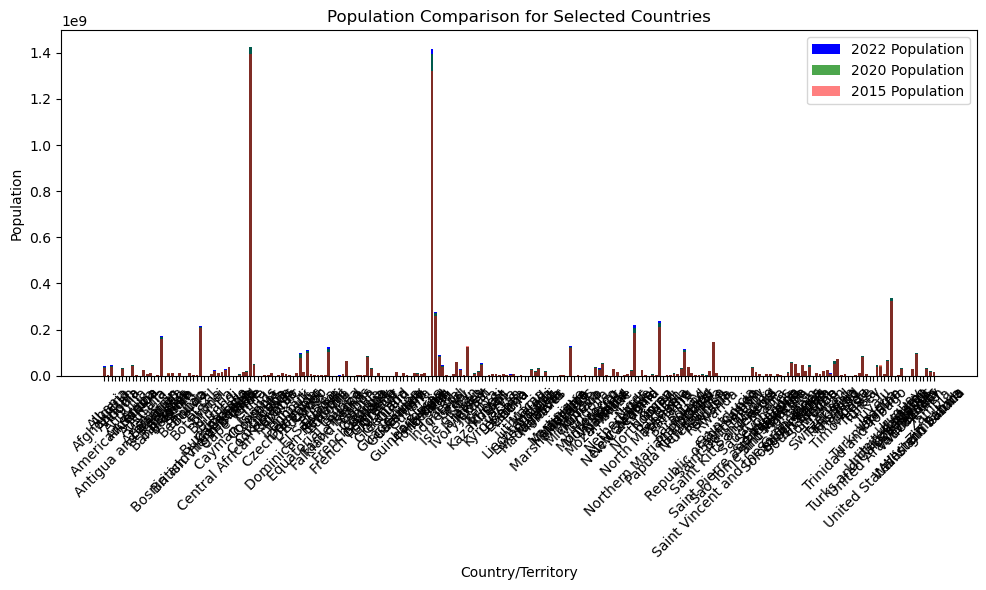

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(data['Country/Territory'], data['2022 Population'], color='blue', label='2022 Population')
plt.bar(data['Country/Territory'], data['2020 Population'], color='green', alpha=0.7, label='2020 Population')
plt.bar(data['Country/Territory'], data['2015 Population'], color='red', alpha=0.5, label='2015 Population')
plt.xlabel('Country/Territory')
plt.ylabel('Population')
plt.title('Population Comparison for Selected Countries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


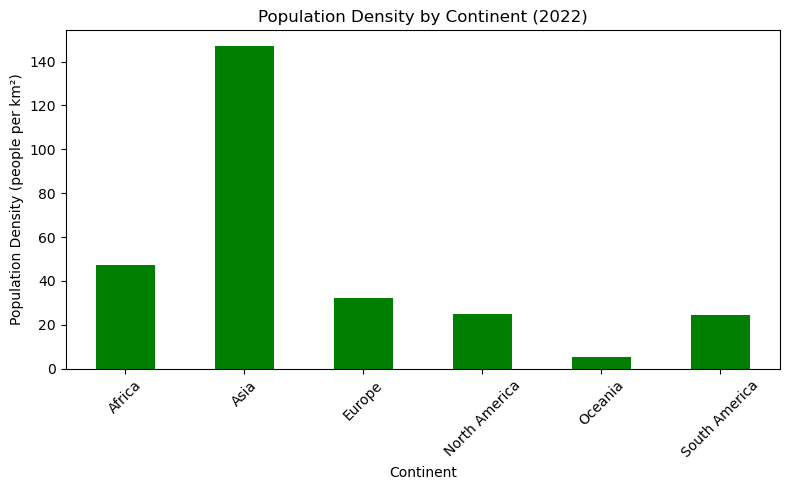

In [17]:
continent_density = data.groupby('Continent')['2022 Population'].sum() / data.groupby('Continent')['Area (km²)'].sum()

plt.figure(figsize=(8, 5))
continent_density.plot(kind='bar', color='green')
plt.xlabel('Continent')
plt.ylabel('Population Density (people per km²)')
plt.title('Population Density by Continent (2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


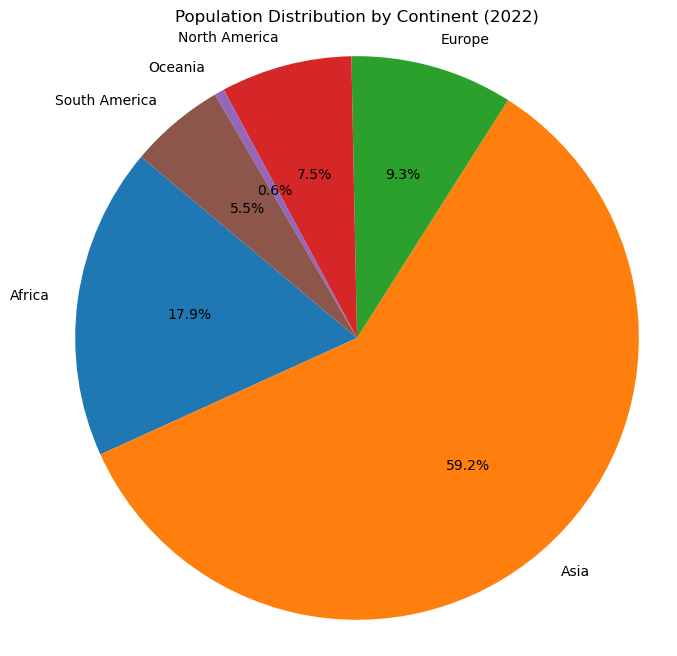

In [18]:
import matplotlib.pyplot as plt

total_population = data['2022 Population'].sum()

continent_population = data.groupby('Continent')['2022 Population'].sum()

plt.figure(figsize=(8, 8))
plt.pie(continent_population, labels=continent_population.index, autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution by Continent (2022)')
plt.axis('equal')  
plt.show()


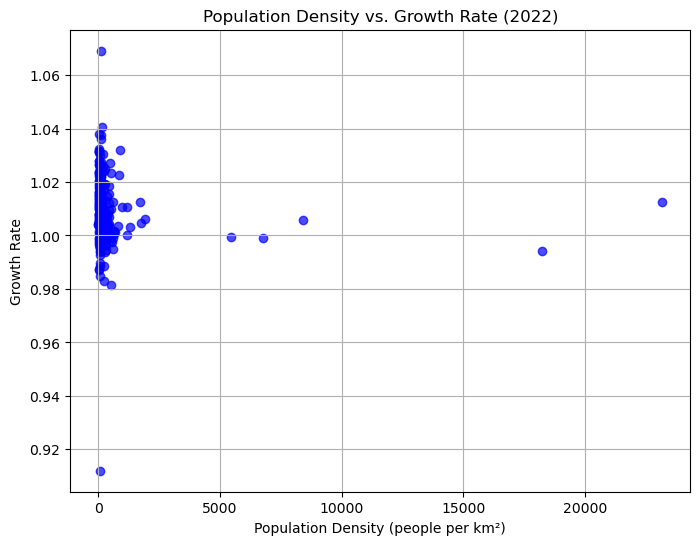

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Density (per km²)'], data['Growth Rate'], color='blue', alpha=0.7)
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Growth Rate')
plt.title('Population Density vs. Growth Rate (2022)')
plt.grid(True)
plt.show()


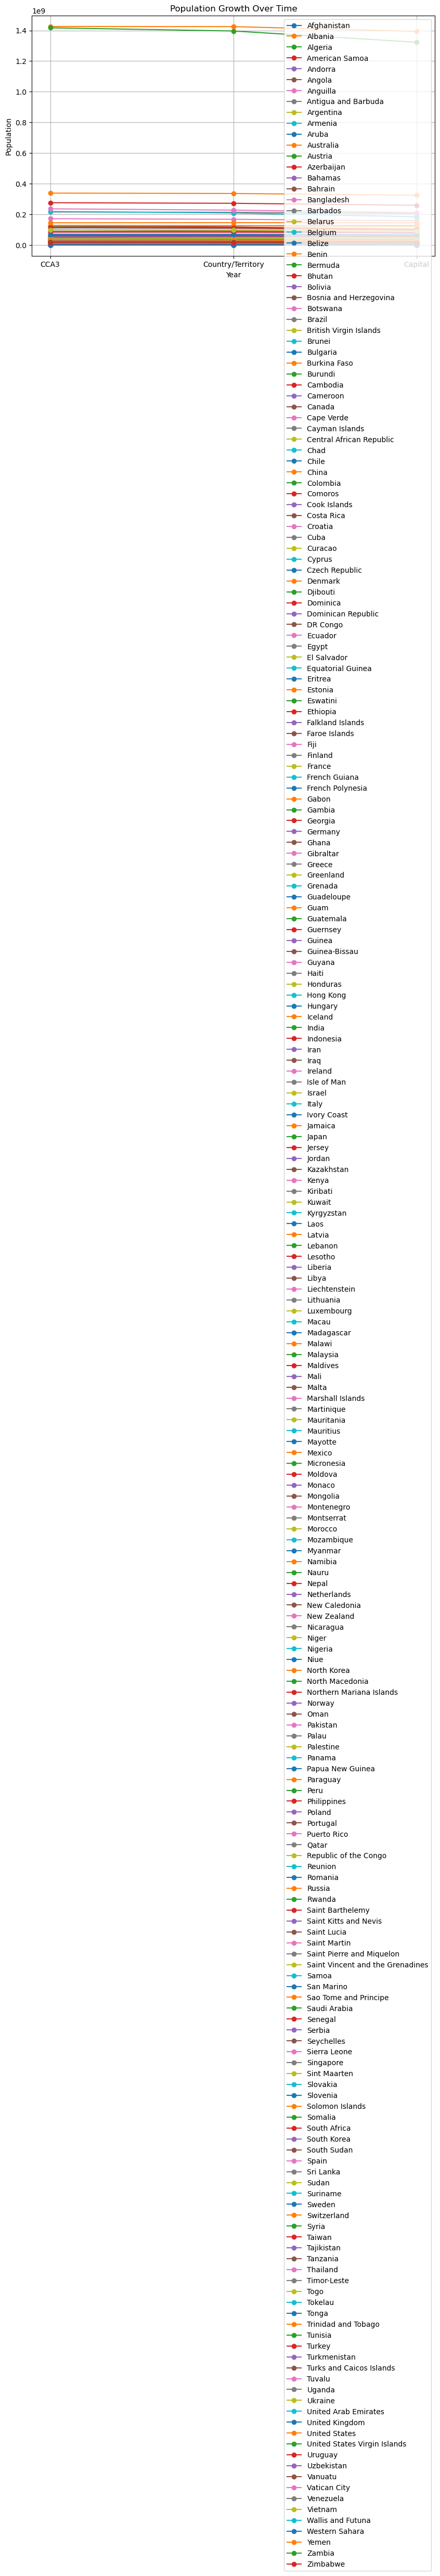

In [21]:
plt.figure(figsize=(10, 6))
for country in data['Country/Territory']:
    plt.plot(data.columns[1:4], data.loc[data['Country/Territory'] == country, '2022 Population':'2015 Population'].values.flatten(), marker='o', label=country)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.legend()
plt.grid(True)
plt.show()


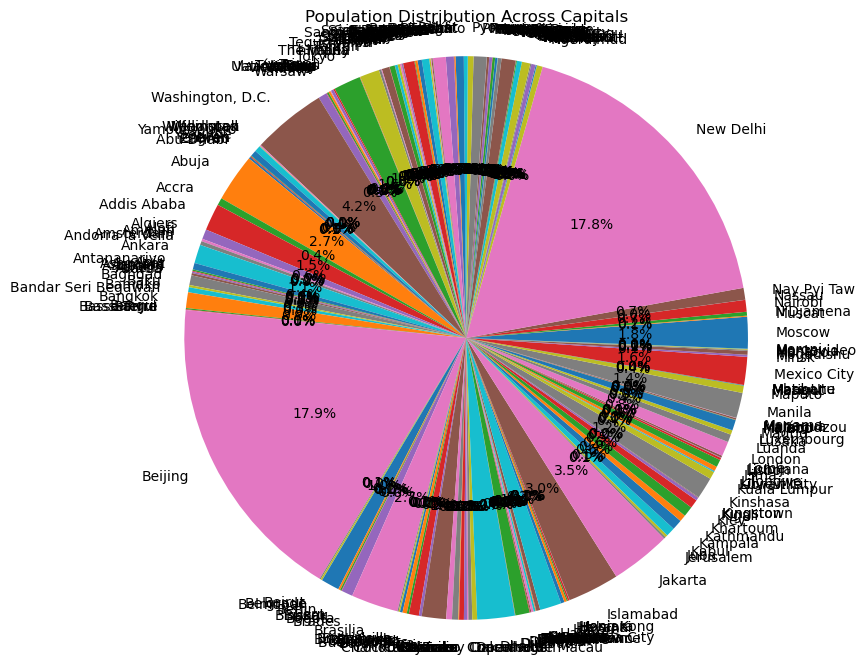

In [22]:
capital_population = data.groupby('Capital')['2022 Population'].sum()

plt.figure(figsize=(8, 8))
plt.pie(capital_population, labels=capital_population.index, autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution Across Capitals')
plt.axis('equal')  
plt.show()